#### Importamos la librería de pandas, matplotlib y cargamos los tres archivos correspondientes a los datos de entrenamiento y los de validación.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import math 

df = pd.read_csv('train.csv')
df22 = pd.read_csv('test.csv')
df33 = pd.read_csv('sample_submission.csv')

#### Tanto en los datos de entrenamiento como en los de validación eleguimos 10 columnas de datos que nos parecen interesantes como el terreno, classificación, año de construccion, de remodelación, de venta, número de baños, etc. Por separado, seleccionamos la columna de precio de venta, que es la variable que queremos predecir.

In [2]:
train = pd.DataFrame(df, columns = ['LotArea', 'MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'HalfBath', 'FullBath', 'BedroomAbvGr', 'PoolArea', 'YrSold'])
precio_train = df['SalePrice']

test = pd.DataFrame(df22, columns = ['LotArea', 'MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'HalfBath', 'FullBath', 'BedroomAbvGr', 'PoolArea', 'YrSold'])
precio_test = df33['SalePrice']

#### Verificamos que los datos se hayan cargado correctamente.

In [3]:
train.head()

,LotArea,MSSubClass,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,FullBath,BedroomAbvGr,PoolArea,YrSold
0,8450,60,2003,2003,1710,1,2,3,0,2008
1,9600,20,1976,1976,1262,0,2,3,0,2007
2,11250,60,2001,2002,1786,1,2,3,0,2008
3,9550,70,1915,1970,1717,0,1,3,0,2006
4,14260,60,2000,2000,2198,1,2,4,0,2008


In [4]:
test.head()

,LotArea,MSSubClass,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,FullBath,BedroomAbvGr,PoolArea,YrSold
0,11622,20,1961,1961,896,0,1,2,0,2010
1,14267,20,1958,1958,1329,1,1,3,0,2010
2,13830,60,1997,1998,1629,1,2,3,0,2010
3,9978,60,1998,1998,1604,1,2,3,0,2010
4,5005,120,1992,1992,1280,0,2,2,0,2010


##### Para que valores tan disperes como el año que se mide en miles y numeros de baños que mide en unidades o decenas tengan el mismo peso dividimos cada columna entre el máximo de cada columna. 

In [5]:
train['LotArea'] = train['LotArea']/(train['LotArea'].max())
train['MSSubClass'] = train['MSSubClass']/(train['MSSubClass'].max())
train['YearBuilt'] = train['YearBuilt']/(train['YearBuilt'].max())
train['YearRemodAdd'] = train['YearRemodAdd']/(train['YearRemodAdd'].max())
train['GrLivArea'] = train['GrLivArea']/(train['GrLivArea'].max())
train['HalfBath'] = train['HalfBath']/(train['HalfBath'].max())
train['FullBath'] = train['FullBath']/(train['FullBath'].max())
train['BedroomAbvGr'] = train['BedroomAbvGr']/(train['BedroomAbvGr'].max())
train['PoolArea'] = train['PoolArea']/(train['PoolArea'].max())
train['YrSold'] = train['YrSold']/(train['YrSold'].max())

test['LotArea'] = test['LotArea']/(test['LotArea'].max())
test['MSSubClass'] = test['MSSubClass']/(test['MSSubClass'].max())
test['YearBuilt'] = test['YearBuilt']/(test['YearBuilt'].max())
test['YearRemodAdd'] = test['YearRemodAdd']/(test['YearRemodAdd'].max())
test['GrLivArea'] = test['GrLivArea']/(test['GrLivArea'].max())
test['HalfBath'] = test['HalfBath']/(test['HalfBath'].max())
test['FullBath'] = test['FullBath']/(test['FullBath'].max())
test['BedroomAbvGr'] = test['BedroomAbvGr']/(test['BedroomAbvGr'].max())
test['PoolArea'] = test['PoolArea']/(test['PoolArea'].max())
test['YrSold'] = test['YrSold']/(test['YrSold'].max())

#### Revisamos que esté todo correcto.

In [6]:
train.head()

,LotArea,MSSubClass,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,FullBath,BedroomAbvGr,PoolArea,YrSold
0,0.039258,0.315789,0.996517,0.996517,0.303084,0.5,0.666667,0.375,0.0,0.999005
1,0.044600,0.105263,0.983085,0.983085,0.223680,0.0,0.666667,0.375,0.0,0.998507
2,0.052266,0.315789,0.995522,0.996020,0.316554,0.5,0.666667,0.375,0.0,0.999005
3,0.044368,0.368421,0.952736,0.980100,0.304325,0.0,0.333333,0.375,0.0,0.998010
4,0.066250,0.315789,0.995025,0.995025,0.389578,0.5,0.666667,0.500,0.0,0.999005


In [7]:
test.head()

,LotArea,MSSubClass,YearBuilt,YearRemodAdd,GrLivArea,HalfBath,FullBath,BedroomAbvGr,PoolArea,YrSold
0,0.205336,0.105263,0.975622,0.975622,0.175859,0.0,0.25,0.333333,0.0,1.0
1,0.252067,0.105263,0.974129,0.974129,0.260844,0.5,0.25,0.500000,0.0,1.0
2,0.244346,0.315789,0.993532,0.994030,0.319725,0.5,0.50,0.500000,0.0,1.0
3,0.176290,0.315789,0.994030,0.994030,0.314818,0.5,0.50,0.500000,0.0,1.0
4,0.088428,0.631579,0.991045,0.991045,0.251227,0.0,0.50,0.333333,0.0,1.0


##### Veamos como se relacionan algunas de nuestras variables contra el precio.

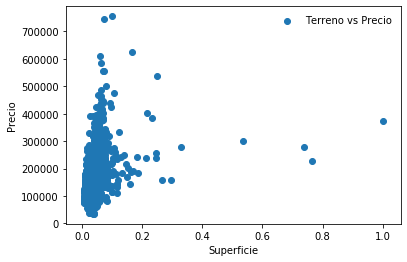

In [8]:
plt.scatter(train['LotArea'], precio_train, label='Terreno vs Precio')
plt.legend(loc='best', frameon=False)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.show()

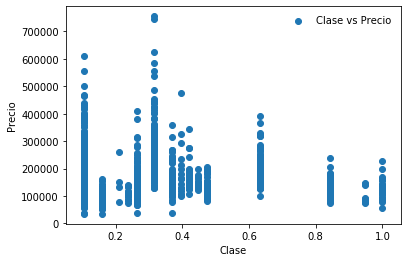

In [9]:
plt.scatter(train['MSSubClass'], precio_train, label='Clase vs Precio')
plt.legend(loc='best', frameon=False)
plt.xlabel('Clase')
plt.ylabel('Precio')
plt.show()

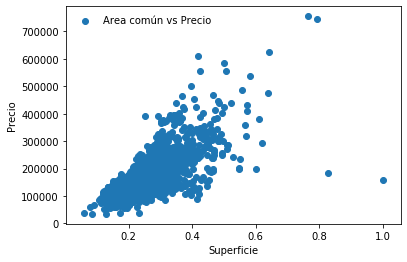

In [10]:
plt.scatter(train['GrLivArea'], precio_train, label='Area común vs Precio')
plt.legend(loc='best', frameon=False)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.show()

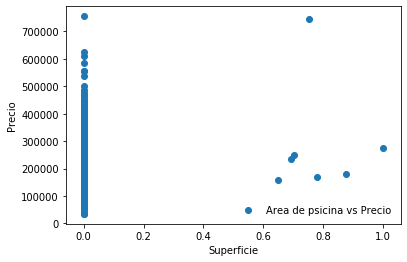

In [11]:
plt.scatter(train['PoolArea'], precio_train, label='Area de psicina vs Precio')
plt.legend(loc='best', frameon=False)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.show()

#### Estamos listos para aplicar nuestros modelos. Importamos los modelos de regresión lineal, lasso y Ridge. Veamos cual tiene mejor desempeño.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge

##### Regresión lineal.

In [13]:
lineal_model = LinearRegression()
lineal_model.fit(train, precio_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lineal_model.score(train, precio_train)

0.7195855665885313

In [15]:
lineal_model.score(test, precio_test)

-17.447572524363608

##### Lasso

In [16]:
lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e6)
lasso_model.fit(train, precio_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
lasso_model.score(train, precio_train)

0.7195843629755905

In [18]:
lasso_model.score(test, precio_test)

-17.40361605715998

##### Ridge

In [19]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(train, precio_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
ridge_model.score(train, precio_train)

0.6727979813846945

In [21]:
ridge_model.score(test, precio_test)

-11.59216349224297

#### Observamos que el modelo de regresión lineal y el de Lasso ajustan mejor a nuestros datos pero se desempeñan pobremente a la hora de predecir en la fase de validación. En cambio, el modelo de Ridge ajusta menos a los datos, pero tiene un mejor desempeño en la fase de validación. 